#**PROJETO FINAL** - 🚨TRANSAÇÕES FRAUDULENTAS BANCO GLOBAL TRUST

🧾 Introdução

O presente projeto tem como objetivo o desenvolvimento de um modelo de Machine Learning para detecção de transações bancárias fraudulentas em dados sintéticos do Banco Global Trust.
A análise exploratória inicial abordou a relação entre o tempo das transações (Time) e o valor monetário (Amount), aplicando padronização para garantir consistência nos dados.

Foram utilizadas features derivadas de componentes principais (V1–V28), juntamente com variáveis complementares de tempo e valor, permitindo identificar padrões temporais e financeiros relacionados a fraudes.
A seleção das 10 features mais relevantes foi realizada com base na Mutual Information, reduzindo dimensionalidade e melhorando a performance dos modelos.

Os algoritmos LightGBM e XGBoost foram ajustados por meio do RandomizedSearchCV, utilizando bases de treino e teste estratificadas (70%/30%).
O XGBoost, quando treinado com o DataFrame estendido — incluindo Time e Amount — apresentou o melhor desempenho, com acurácia de 0.9994 e precisão de 0.9550, evidenciando o impacto dessas variáveis no desempenho do modelo e na redução de falsos positivos.

O foco do projeto concentrou-se na maximização da acurácia e precisão, assegurando uma identificação eficiente e confiável de padrões de fraude.

**Sobre as Feautures:**

 - Time - Delta de Variância de tempo entre as transações.

 - V1:V28 - São features que já estão em formato PCA.

 - Amount - Valores.

 - Class - Demarcação de Fraude para 1 e não Fraude para 0.



In [31]:
import pandas as pd
import numpy as np

#Abrir Banco de Dados para Vizualização:

df = pd.read_csv('Base_M43_Pratique_CREDIT_CARD_FRAUD.csv')

print(df.head(10))


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -

In [32]:
print(df.tail(10))

            Time         V1         V2        V3        V4        V5  \
284797  172782.0  -0.241923   0.712247  0.399806 -0.463406  0.244531   
284798  172782.0   0.219529   0.881246 -0.635891  0.960928 -0.152971   
284799  172783.0  -1.775135  -0.004235  1.189786  0.331096  1.196063   
284800  172784.0   2.039560  -0.175233 -1.196825  0.234580 -0.008713   
284801  172785.0   0.120316   0.931005 -0.546012 -0.745097  1.130314   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284797 -1.343668  0.929369 -0.206210  0.106234  ... -0.228876 -0.514376   
284798 -1.014307  0.427126  0.121340 -0.285670  ...  0.09

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Tipos de dados, estão ok.

In [34]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Insigth:**

- Time - Aparentemente uma distribuição normal que com cauda tendenciosa a direita.

Média (mean): 94.813,86

Mediana (50%): 84.692

75% (3º quartil): 139.320,5

Máximo: 172.792


- Amount - 50% está com valor abaixo da mediana e possuie outliers, bem provavel que essa distribuição influencie significativamente na indicação de fraude.

- Class - Transações fraudulentas tem porcentagem quase insignificante.


🔍 **Vou analizar detalhadamente as Feautures:**

**🕒 TIME:**

'Número de transações por tempo'

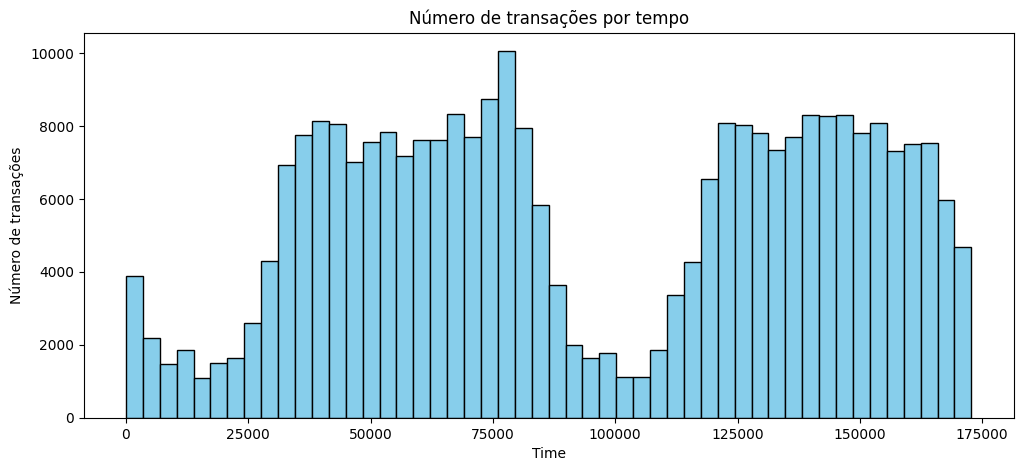

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.hist(df['Time'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Time')
plt.ylabel('Número de transações')
plt.title('Número de transações por tempo')
plt.show()


Insigths Visuais:

- Variação ao longo do tempo:

Há períodos com poucas transações e outros com picos altos, a atividade não é uniforme.

Algumas horas/dias têm mais movimentação. Tipico de movimentações financeiras.

- Padrão de “ondas” ou clusters:

Parece haver grupos de barras mais altas seguidos de grupos mais baixos, indicando períodos de maior e menor atividade.


- Desbalanceamento temporal:

Algumas barras atingem mais de 10.000 transações, enquanto outras ficam abaixo de 2.000 → pode impactar análise de fraude se algumas janelas de tempo tiverem muito poucas fraudes.


'Densidade de Transações ao longo do tempo'

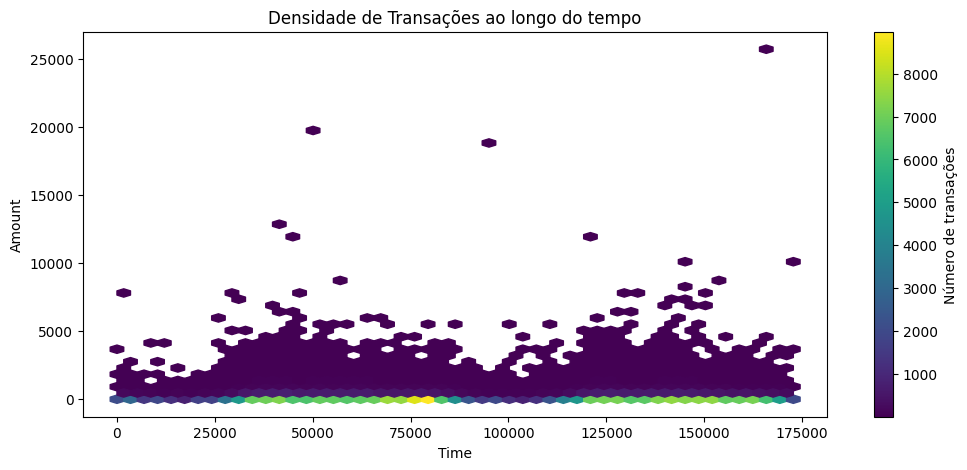

In [36]:
plt.figure(figsize=(12,5))
plt.hexbin(df['Time'], df['Amount'], gridsize=50, cmap='viridis', mincnt=1)  # 'viridis' tem bom contraste
plt.colorbar(label='Número de transações')
plt.title('Densidade de Transações ao longo do tempo')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()


Insigth Visual: As transações apresentam densidades de valores bem proximas entre si, apresentando outliers acima de 10k.

**💰 AMOUNT:**

'BoxPlot Amount'

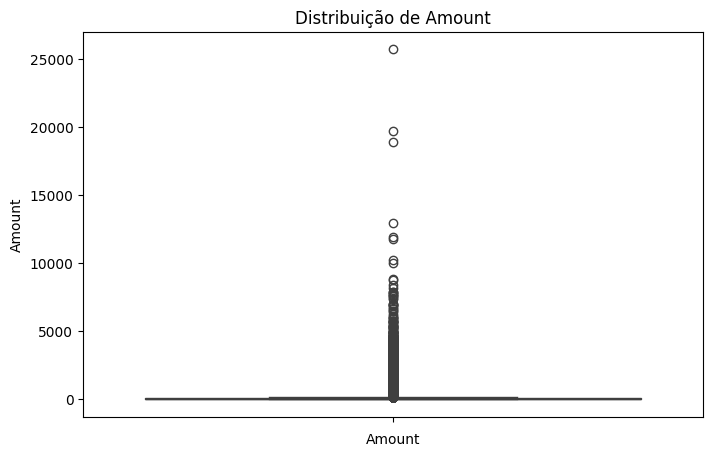

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(y=df['Amount'])
plt.title('Distribuição de Amount')
plt.xlabel('Amount')
plt.show()


Insigth: Muitos outliers. Vou buscar os valores de upper fence para entender quais valores superam o boxplot.

In [38]:
import numpy as np

# Selecionar coluna
amount = df['Amount']

# Calcular quartis
Q1 = np.percentile(amount, 25)
Q3 = np.percentile(amount, 75)
IQR = Q3 - Q1

# Calcular fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")


Q1: 5.6
Q3: 77.16499999999999
IQR: 71.565
Lower Fence: -101.7475
Upper Fence: 184.5125


Insigth: Valores mais comuns nas transações estão em torno de 71,56 reais e no maximo de 184,51 reais esses valores acima do upper fence podem ser redflags para transações fraudulentas.

Importante ressaltar que: Apesar de notar os comportamentos fraudulentos eles não serão tratados aqui porque são exatamento o que estou buscando identificar com o ML. Caso ocorresse o tratamento desses dados haveria distorção da realidade o quê afetaria diretamente a detecção do ML.

'Transações e Fraudes ao longo do tempo'

/tmp/ipython-input-1282807952.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_temp['Hour'] = df_temp['Time_dt'].dt.floor('H')


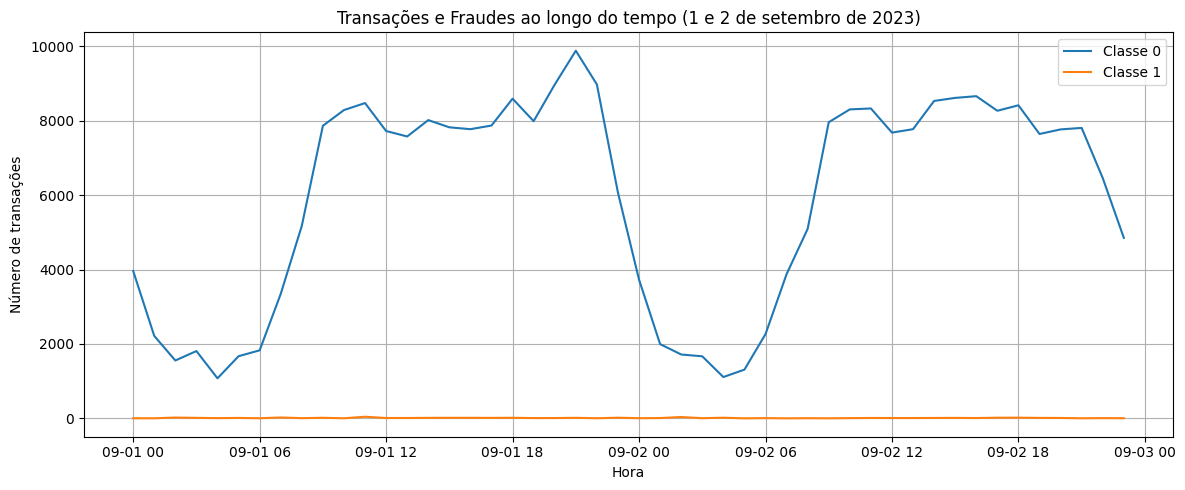


=== Verificação: df original intacto ===
'Time_dt' no df original? False
'Hour' no df original? False
Tipo de 'Time' no df original: float64


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar uma CÓPIA para não afetar o df original
df_temp = df.copy()

# Converter a coluna 'Time' em datetime, com origem em 1º de setembro de 2023
df_temp['Time_dt'] = pd.to_datetime(df_temp['Time'], unit='s', origin='2023-09-01')

# Agrupar por hora
df_temp['Hour'] = df_temp['Time_dt'].dt.floor('H')

# Contar transações por classe e hora
df_grouped = df_temp.groupby(['Hour', 'Class']).size().reset_index(name='count')

# Criar tabela pivô com uma coluna para cada classe
df_pivot = df_grouped.pivot(index='Hour', columns='Class', values='count').fillna(0)

# Plotar gráfico
plt.figure(figsize=(12, 5))
for cls in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[cls], label=f'Classe {cls}')

plt.title('Transações e Fraudes ao longo do tempo (1 e 2 de setembro de 2023)')
plt.xlabel('Hora')
plt.ylabel('Número de transações')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Verificar que o df original não foi alterado
print("\n=== Verificação: df original intacto ===")
print(f"'Time_dt' no df original? {'Time_dt' in df.columns}")
print(f"'Hour' no df original? {'Hour' in df.columns}")
print(f"Tipo de 'Time' no df original: {df['Time'].dtype}")

Insigth Visual: Apesar da Classe 1 estar marcando uma linha bem proximo do zero, ela existe e está com valores muito baixos. Acentuando o quanto o df é desbalanceado.

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- 1. Criar o scaler ---
scaler = StandardScaler()

# --- 2. Criar uma cópia do DataFrame original ---
df_clean = df.copy()

# --- 3. Padronizar apenas a coluna 'Amount' ---
df_clean['Amount'] = scaler.fit_transform(df_clean[['Amount']])

# --- 4. Conferir se foi substituída corretamente ---
print("Pré-visualização da coluna Amount padronizada:")
print(df_clean[['Amount']].head())

# --- 5. Salvar o df_clean dentro do ambiente de programação ---
df_clean.to_csv('df_clean.csv', index=False)

print("\n✅ O DataFrame df_clean foi salvo no ambiente como 'df_clean.csv'!")

# --- (Opcional) Para baixar no Google Colab ---
# from google.colab import files
# files.download('df_clean.csv')


Pré-visualização da coluna Amount padronizada:
     Amount
0  0.244964
1 -0.342475
2  1.160686
3  0.140534
4 -0.073403

✅ O DataFrame df_clean foi salvo no ambiente como 'df_clean.csv'!


In [41]:
# Abrir o df_clean e verificar se deu tudo certo na conversão:
df = pd.read_csv('df_clean.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


Insigth: Pelo fato de os valores serem relativamente bem diferentes entre si, para a melhor eficiencia do ML foi se padronizado os valores de Amount.

**🧪 TIME + AMOUNT: Relação entre os dois.**

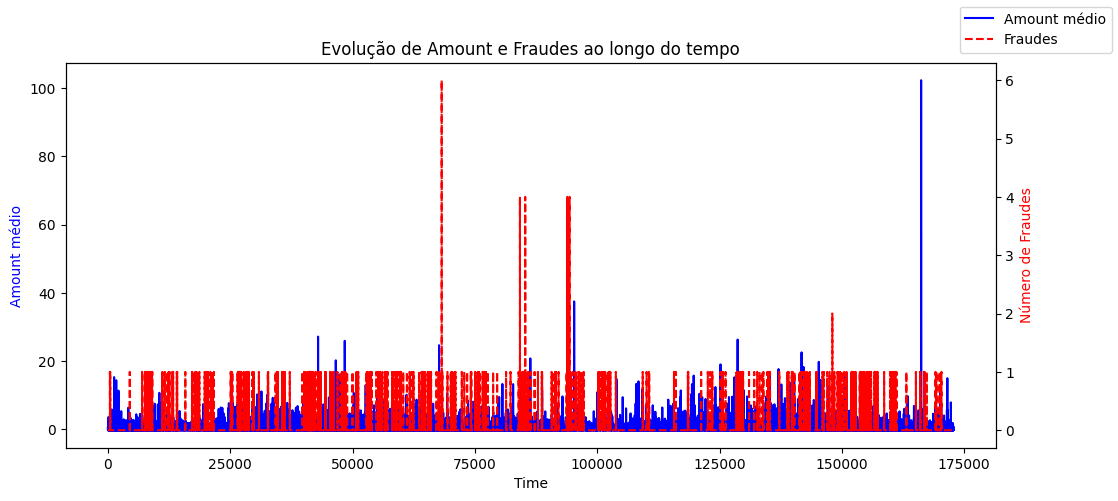

In [42]:
time_summary = df.groupby('Time').agg({'Amount':'mean', 'Class':'sum'}).reset_index()

fig, ax1 = plt.subplots(figsize=(12,5))

ax1.plot(time_summary['Time'], time_summary['Amount'], color='blue', label='Amount médio')
ax2 = ax1.twinx()
ax2.plot(time_summary['Time'], time_summary['Class'], color='red', label='Fraudes', linestyle='--')

ax1.set_xlabel('Time')
ax1.set_ylabel('Amount médio', color='blue')
ax2.set_ylabel('Número de Fraudes', color='red')

fig.legend(loc='upper right')
plt.title('Evolução de Amount e Fraudes ao longo do tempo')
plt.show()


Insigth Visual: Essa visualização mostra a relação temporal entre valores médios e fraudes, bem interessante ver que apesar de os valores estarem bem proximos entre si ao longo do tempo (regular e fraudulento) os valores fraudulentos ainda aparecem com amounts maiores. Com excessão de um pico de regular que nesse caso é tratado como Outlier da Class regular a proximidade do Time = 175000

**🕵️‍♀️ CLASS:**

'Quantidade de transações por classe'

/tmp/ipython-input-1528300790.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=['green','red'])


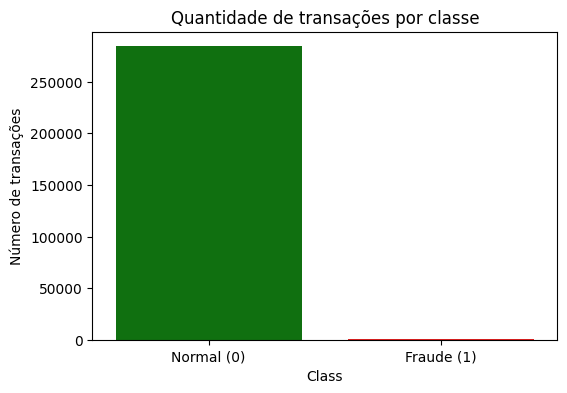

In [43]:
# Contagem de transações por classe
class_counts = df['Class'].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=['green','red'])
plt.xticks([0,1], ['Normal (0)', 'Fraude (1)'])
plt.ylabel('Número de transações')
plt.title('Quantidade de transações por classe')
plt.show()

Insigth: Data Frame altamente desbalanceado.

Como o DataFrame está praticamente já padronizado e normalizado para o treinamento e teste do ML, não há muito o que se fazer nessa parte de pre-processamento dos dados. Vamos para a etapa de modelagem do ML. Apartir daqui vou usar o df_clean para treinamento e teste do ML (Único Pré-Processamento feito foi com a normalização dos valores de Amount).

**# 🤖 MODELAGEM MACHINE LEARNING.**

O Objetivo é a criação de um ML rápido, no qual já detecte e indique os redflags ao sistema. Para isso vou usar a correlação não linear dos valores para saber quais as feautures correlacionadas mais fortemente com a target.

' Correlação Não Linear'

- Porque usar o Mutual Information:
✅ Captura relações não lineares

✅ Funciona bem com dados desbalanceados (492 fraudes vs 284315 normais)

✅ Não assume distribuição específica

✅ As features V1-V28 são PCA components, então relações podem ser não lineares

✅ Rápido de calcular

=== Verificando tipos de dados ===
float64    30
Name: count, dtype: int64

Shape de X: (284807, 30)
Shape de y: (284807,)

⏳ Calculando Mutual Information...

=== Top 15 Features por Mutual Information ===
   Feature  MI_Score
17     V17  0.008258
14     V14  0.008136
12     V12  0.007601
10     V10  0.007530
11     V11  0.006831
16     V16  0.006144
4       V4  0.004976
3       V3  0.004952
18     V18  0.004317
9       V9  0.004277
7       V7  0.003951
2       V2  0.003228
21     V21  0.002452
27     V27  0.002444
5       V5  0.002389

=== Top 10 Features (lista) ===
['V17', 'V14', 'V12', 'V10', 'V11', 'V16', 'V4', 'V3', 'V18', 'V9']


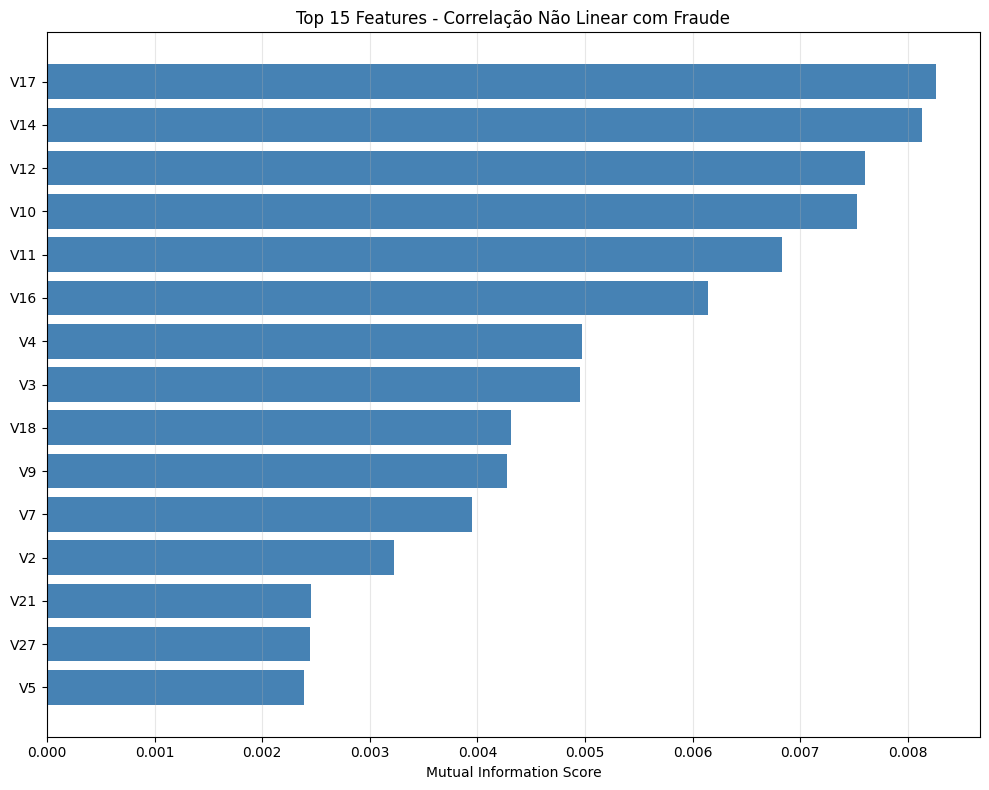


✅ Análise concluída! 30 features analisadas.


In [45]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Abrir o CSV limpo ---
df = pd.read_csv('df_clean.csv')

# --- 2. Separar X e y ---
X = df.drop('Class', axis=1)
y = df['Class']

# --- 3. Garantir que todas as colunas são numéricas ---
print("=== Verificando tipos de dados ===")
print(X.dtypes.value_counts())
print(f"\nShape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

# --- 4. Calcular Mutual Information ---
print("\n⏳ Calculando Mutual Information...")
mi_scores = mutual_info_classif(X, y, random_state=42, n_neighbors=3)

# --- 5. Criar DataFrame com os scores ---
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print("\n=== Top 15 Features por Mutual Information ===")
print(mi_df.head(15))

print(f"\n=== Top 10 Features (lista) ===")
print(mi_df.head(10)['Feature'].tolist())

# --- 6. Visualizar resultados ---
plt.figure(figsize=(10, 8))
plt.barh(mi_df['Feature'][:15], mi_df['MI_Score'][:15], color='steelblue')
plt.xlabel('Mutual Information Score')
plt.title('Top 15 Features - Correlação Não Linear com Fraude')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# --- 7. Resultado final ---
print(f"\n✅ Análise concluída! {len(X.columns)} features analisadas.")


=== Top 10 Features (lista) ===
['V17', 'V14', 'V12', 'V10', 'V11', 'V16', 'V4', 'V3', 'V18', 'V9']

A partir dessa observação o quê será feito:

O Objetivo do projeto é a criação de algoritimo com alta acurácia o qual indique a menor porcentagem de falsos negativos de forma rápida.

Serão usados dois tipos de Machine Learning:

- LightGBM (Light Gradient Boosting Machine)

- XGBoost (Extreme Gradient Boosting)

Nos quais serão treinados e testados duas bases:

- **df_top_features.csv** = DataFrame somente com as 10 features mais importantes.

- **df_top_features_extended.csv** = DataFrame somente com as 10 features mais importantes mais feautures de ruído (Time e Amount).

Então, ocorrerá a comparação de desempenho entre os dois ML's e as bases para verificar qual retornou a maior acurácia com as menores porcentagens de falsos negativos.

- Criação do df_top_features.csv = DataFrame somente com as 10 features mais importantes.

In [46]:
import pandas as pd

# Recarregar o DataFrame limpo (caso ainda não esteja na memória)
df_clean = pd.read_csv('df_clean.csv')

# Lista das 10 melhores features (obtida pela Mutual Information)
top_features = ['V17', 'V14', 'V12', 'V10', 'V11', 'V16', 'V4', 'V3', 'V18', 'V9']

# Criar novo DataFrame apenas com as top features + a coluna alvo
df_top = df_clean[top_features + ['Class']]

# Verificar o resultado
print("✅ Novo DataFrame criado com as Top 10 features + Class:")
print(df_top.head())

# Conferir formato
print(f"\nShape do novo DataFrame: {df_top.shape}")

# Salvar dentro do ambiente de programação
df_top.to_csv('df_top_features.csv', index=False)

print("\n💾 Arquivo 'df_top_features.csv' salvo no ambiente de programação!")


✅ Novo DataFrame criado com as Top 10 features + Class:
        V17       V14       V12       V10       V11       V16        V4  \
0  0.207971 -0.311169 -0.617801  0.090794 -0.551600 -0.470401  1.378155   
1 -0.114805 -0.143772  1.065235 -0.166974  1.612727  0.463917  0.448154   
2  1.109969 -0.165946  0.066084  0.207643  0.624501 -2.890083  0.379780   
3 -0.684093 -0.287924  0.178228 -0.054952 -0.226487 -1.059647 -0.863291   
4 -0.237033 -1.119670  0.538196  0.753074 -0.822843 -0.451449  0.403034   

         V3       V18        V9  Class  
0  2.536347  0.025791  0.363787      0  
1  0.166480 -0.183361 -0.255425      0  
2  1.773209 -0.121359 -1.514654      0  
3  1.792993  1.965775 -1.387024      0  
4  1.548718 -0.038195  0.817739      0  

Shape do novo DataFrame: (284807, 11)

💾 Arquivo 'df_top_features.csv' salvo no ambiente de programação!


- **df_top_features_extended.csv** = DataFrame somente com as 10 features mais importantes mais feautures de ruído (Time e Amount).

In [47]:
import pandas as pd

# --- 1. Recarregar o DataFrame limpo ---
df_clean = pd.read_csv('df_clean.csv')

# --- 2. Lista das 10 melhores features (obtidas pela Mutual Information) ---
top_features = ['V17', 'V14', 'V12', 'V10', 'V11', 'V16', 'V4', 'V3', 'V18', 'V9']

# --- 3. Criar novo DataFrame com as Top 10 + Time + Amount + Class ---
selected_features = top_features + ['Time', 'Amount', 'Class']
df_top_extended = df_clean[selected_features]

# --- 4. Verificar o resultado ---
print("✅ Novo DataFrame criado com as Top 10 features + Time + Amount + Class:")
print(df_top_extended.head())

# --- 5. Conferir formato ---
print(f"\nShape do novo DataFrame: {df_top_extended.shape}")

# --- 6. Salvar dentro do ambiente de programação ---
df_top_extended.to_csv('df_top_features_extended.csv', index=False)

print("\n💾 Arquivo 'df_top_features_extended.csv' salvo no ambiente de programação!")


✅ Novo DataFrame criado com as Top 10 features + Time + Amount + Class:
        V17       V14       V12       V10       V11       V16        V4  \
0  0.207971 -0.311169 -0.617801  0.090794 -0.551600 -0.470401  1.378155   
1 -0.114805 -0.143772  1.065235 -0.166974  1.612727  0.463917  0.448154   
2  1.109969 -0.165946  0.066084  0.207643  0.624501 -2.890083  0.379780   
3 -0.684093 -0.287924  0.178228 -0.054952 -0.226487 -1.059647 -0.863291   
4 -0.237033 -1.119670  0.538196  0.753074 -0.822843 -0.451449  0.403034   

         V3       V18        V9  Time    Amount  Class  
0  2.536347  0.025791  0.363787   0.0  0.244964      0  
1  0.166480 -0.183361 -0.255425   0.0 -0.342475      0  
2  1.773209 -0.121359 -1.514654   1.0  1.160686      0  
3  1.792993  1.965775 -1.387024   1.0  0.140534      0  
4  1.548718 -0.038195  0.817739   2.0 -0.073403      0  

Shape do novo DataFrame: (284807, 13)

💾 Arquivo 'df_top_features_extended.csv' salvo no ambiente de programação!


**Observação:** O Mutual Information é o método principal para escolha de features mas será validado com LigthGBM e o XGBoost para ter maior confiança na seleção de features.

✂️ — train/test split

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1️⃣ Carregar o DataFrame salvo
df_top = pd.read_csv('df_top_features.csv')

# 2️⃣ Separar as variáveis independentes (X) e a variável alvo (y)
X = df_top.drop('Class', axis=1)
y = df_top['Class']

# 3️⃣ Dividir em treino e teste (70% treino, 30% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# 4️⃣ Exibir o resultado da divisão
print("✅ Divisão concluída!")
print(f"Tamanho total: {len(df_top)} registros")
print(f"Tamanho treino: {len(X_treino)} registros")
print(f"Tamanho teste: {len(X_teste)} registros")

# 5️⃣ Salvar cada parte no ambiente de programação
X_treino.to_csv('X_treino.csv', index=False)
X_teste.to_csv('X_teste.csv', index=False)
y_treino.to_csv('y_treino.csv', index=False)
y_teste.to_csv('y_teste.csv', index=False)

print("\n💾 Arquivos salvos com sucesso:")
print(" - X_treino.csv")
print(" - X_teste.csv")
print(" - y_treino.csv")
print(" - y_teste.csv")


✅ Divisão concluída!
Tamanho total: 284807 registros
Tamanho treino: 199364 registros
Tamanho teste: 85443 registros

💾 Arquivos salvos com sucesso:
 - X_treino.csv
 - X_teste.csv
 - y_treino.csv
 - y_teste.csv


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1️⃣ Carregar o DataFrame estendido
df_ext = pd.read_csv('df_top_features_extended.csv')

# 2️⃣ Separar as variáveis independentes (X) e a variável alvo (y)
X_ext = df_ext.drop('Class', axis=1)
y_ext = df_ext['Class']

# 3️⃣ Dividir em treino e teste (70% treino, 30% teste)
X_treino_ext, X_teste_ext, y_treino_ext, y_teste_ext = train_test_split(
    X_ext, y_ext,
    test_size=0.3,
    random_state=42,
    stratify=y_ext
)

# 4️⃣ Exibir o resultado da divisão
print("✅ Divisão concluída para df_top_features_extended!")
print(f"Tamanho total: {len(df_ext)} registros")
print(f"Tamanho treino: {len(X_treino_ext)} registros")
print(f"Tamanho teste: {len(X_teste_ext)} registros")

# 5️⃣ Salvar cada parte no ambiente de programação
X_treino_ext.to_csv('X_treino_ext.csv', index=False)
X_teste_ext.to_csv('X_teste_ext.csv', index=False)
y_treino_ext.to_csv('y_treino_ext.csv', index=False)
y_teste_ext.to_csv('y_teste_ext.csv', index=False)

print("\n💾 Arquivos salvos com sucesso (versão extended):")
print(" - X_treino_ext.csv")
print(" - X_teste_ext.csv")
print(" - y_treino_ext.csv")
print(" - y_teste_ext.csv")


✅ Divisão concluída para df_top_features_extended!
Tamanho total: 284807 registros
Tamanho treino: 199364 registros
Tamanho teste: 85443 registros

💾 Arquivos salvos com sucesso (versão extended):
 - X_treino_ext.csv
 - X_teste_ext.csv
 - y_treino_ext.csv
 - y_teste_ext.csv


**💡⚡🚀 LightGBM (Light Gradient Boosting Machine):**

RandomSearchCV + Treino & Teste do Machine Learning.


- **df_top_features.csv** = DataFrame somente com as 10 features mais importantes.

- **df_top_features_extended.csv** = DataFrame somente com as 10 features mais importantes mais feautures de ruído (Time e Amount).

1) **df_top_features.csv** + RandomSearchCV

- X_treino.csv
 - X_teste.csv
 - y_treino.csv
 - y_teste.csv

In [53]:
# ⚡️ Random Search para otimizar LightGBM (versão rápida e otimizada)
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint, uniform
import joblib

# 1️⃣ Carregar as bases salvas
X_treino = pd.read_csv('X_treino.csv')
X_teste = pd.read_csv('X_teste.csv')
y_treino = pd.read_csv('y_treino.csv').squeeze()  # squeeze() → converte de DataFrame p/ Series
y_teste = pd.read_csv('y_teste.csv').squeeze()

print("✅ Bases carregadas com sucesso!")
print(f"Shape treino: {X_treino.shape}, teste: {X_teste.shape}")

# 2️⃣ Criar modelo base do LightGBM
modelo_lgb = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

# 3️⃣ Definir espaço de busca dos hiperparâmetros
param_dist = {
    'num_leaves': randint(20, 150),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.005, 0.1),
    'n_estimators': randint(100, 1000),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# 4️⃣ Configurar o RandomizedSearchCV (versão rápida)
random_search = RandomizedSearchCV(
    estimator=modelo_lgb,
    param_distributions=param_dist,
    n_iter=15,           # reduzido de 50 → 15
    scoring='f1',        # foco em equilíbrio precisão/recall
    cv=2,                # reduzido de 3 → 2 (mais rápido)
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 5️⃣ Rodar o Random Search
print("\n🔍 Iniciando busca pelos melhores parâmetros...")
random_search.fit(X_treino, y_treino)

# 6️⃣ Exibir melhores parâmetros encontrados
print("\n🏆 Melhores parâmetros encontrados:")
print(random_search.best_params_)

# 7️⃣ Avaliar no conjunto de teste
melhor_lgb = random_search.best_estimator_
y_pred = melhor_lgb.predict(X_teste)

print("\n📊 Avaliação no conjunto de teste:")
print(classification_report(y_teste, y_pred))
print(f"Acurácia: {accuracy_score(y_teste, y_pred):.4f}")

# 8️⃣ Salvar o modelo treinado
joblib.dump(melhor_lgb, 'best_lightgbm_model.pkl')
print("\n💾 Modelo salvo como 'best_lightgbm_model.pkl'")


✅ Bases carregadas com sucesso!
Shape treino: (199364, 10), teste: (85443, 10)

🔍 Iniciando busca pelos melhores parâmetros...
Fitting 2 folds for each of 15 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360519
[LightGBM] [Info] Start training from score -6.360519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

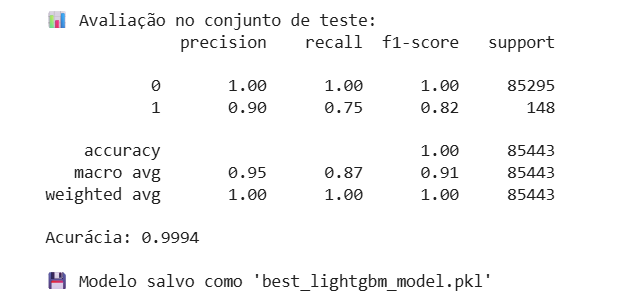

2) **df_top_features_extend.csv** + RandomSearchCV

 - X_treino_ext.csv
 - X_teste_ext.csv
 - y_treino_ext.csv
 - y_teste_ext.csv

In [54]:
# ⚡️ Random Search para otimizar LightGBM (versão rápida e otimizada - Extended)
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint, uniform
import joblib

# 1️⃣ Carregar as bases salvas (versão extended)
X_treino_ext = pd.read_csv('X_treino_ext.csv')
X_teste_ext = pd.read_csv('X_teste_ext.csv')
y_treino_ext = pd.read_csv('y_treino_ext.csv').squeeze()  # squeeze → converte p/ Series
y_teste_ext = pd.read_csv('y_teste_ext.csv').squeeze()

print("✅ Bases estendidas carregadas com sucesso!")
print(f"Shape treino: {X_treino_ext.shape}, teste: {X_teste_ext.shape}")

# 2️⃣ Criar modelo base do LightGBM
modelo_lgb_ext = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

# 3️⃣ Definir espaço de busca dos hiperparâmetros (otimizado)
param_dist_ext = {
    'num_leaves': randint(20, 150),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.005, 0.1),
    'n_estimators': randint(100, 800),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 0.5),
    'reg_lambda': uniform(0, 0.5)
}

# 4️⃣ Configurar o RandomizedSearchCV (versão rápida)
random_search_ext = RandomizedSearchCV(
    estimator=modelo_lgb_ext,
    param_distributions=param_dist_ext,
    n_iter=15,            # reduzido de 50 → 15
    scoring='f1',         # F1 ideal para fraudes
    cv=2,                 # reduzido de 3 → 2 (mais rápido)
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 5️⃣ Rodar o Random Search
print("\n🔍 Iniciando busca pelos melhores parâmetros (Extended)...")
random_search_ext.fit(X_treino_ext, y_treino_ext)

# 6️⃣ Exibir melhores parâmetros encontrados
print("\n🏆 Melhores parâmetros encontrados (Extended):")
print(random_search_ext.best_params_)

# 7️⃣ Avaliar no conjunto de teste
melhor_lgb_ext = random_search_ext.best_estimator_
y_pred_ext = melhor_lgb_ext.predict(X_teste_ext)

print("\n📊 Avaliação no conjunto de teste (Extended):")
print(classification_report(y_teste_ext, y_pred_ext))
print(f"Acurácia: {accuracy_score(y_teste_ext, y_pred_ext):.4f}")

# 8️⃣ Salvar o modelo treinado
joblib.dump(melhor_lgb_ext, 'best_lightgbm_model_extended.pkl')
print("\n💾 Modelo salvo como 'best_lightgbm_model_extended.pkl'")


✅ Bases estendidas carregadas com sucesso!
Shape treino: (199364, 12), teste: (85443, 12)

🔍 Iniciando busca pelos melhores parâmetros (Extended)...
Fitting 2 folds for each of 15 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360519
[LightGBM] [Info] Start training from score -6.360519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

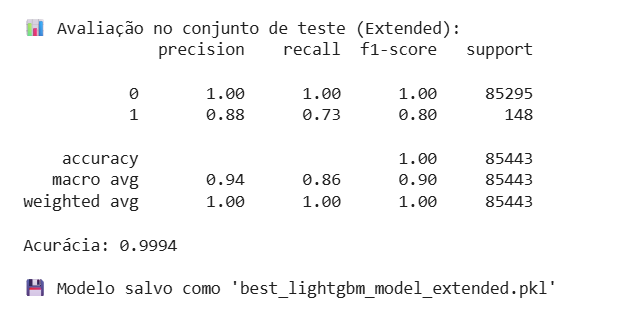


**🔵⚙️📊 XGBOOST:**

RandomSearchCV + Treino & Teste do Machine Learning.


- **df_top_features.csv** = DataFrame somente com as 10 features mais importantes.

- **df_top_features_extended.csv** = DataFrame somente com as 10 features mais importantes mais feautures de ruído (Time e Amount).

1) **df_top_features.csv** + RandomSearchCV

- X_treino.csv
 - X_teste.csv
 - y_treino.csv
 - y_teste.csv

In [55]:
# ⚡️ Random Search para otimizar XGBoost (foco: alta acurácia e minimização de falsos positivos)
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score
from scipy.stats import randint, uniform
import joblib
import numpy as np

# 1️⃣ Carregar as bases salvas
X_treino = pd.read_csv('X_treino.csv')
X_teste = pd.read_csv('X_teste.csv')
y_treino = pd.read_csv('y_treino.csv').squeeze()
y_teste = pd.read_csv('y_teste.csv').squeeze()

print("✅ Bases carregadas com sucesso!")
print(f"Shape treino: {X_treino.shape}, teste: {X_teste.shape}")

# 2️⃣ Criar modelo base do XGBoost
modelo_xgb = xgb.XGBClassifier(
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss',  # evita warnings
    tree_method='hist'      # mais rápido e eficiente em grandes bases
)

# 3️⃣ Espaço de busca — mais conservador (menos falsos positivos)
param_dist = {
    'n_estimators': randint(200, 800),        # mais árvores para estabilidade
    'max_depth': randint(3, 8),               # profundidade controlada
    'learning_rate': uniform(0.01, 0.1),      # aprendizado mais lento
    'subsample': uniform(0.6, 0.3),           # menor amostragem → menos overfitting
    'colsample_bytree': uniform(0.6, 0.3),
    'gamma': uniform(0.2, 1),                 # penaliza divisões fracas
    'reg_alpha': uniform(0.3, 1),             # L1 regularização (penaliza features irrelevantes)
    'reg_lambda': uniform(0.7, 1.5)           # L2 regularização (suaviza modelo)
}

# 4️⃣ Configurar o RandomizedSearchCV (foco em precisão)
random_search = RandomizedSearchCV(
    estimator=modelo_xgb,
    param_distributions=param_dist,
    n_iter=15,           # menor busca = mais rápido
    scoring='precision', # prioriza acertos reais e minimiza falsos positivos
    cv=2,                # cross-validation leve
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 5️⃣ Rodar o Random Search
print("\n🔍 Iniciando busca pelos melhores parâmetros (XGBoost)...")
random_search.fit(X_treino, y_treino)

# 6️⃣ Exibir melhores parâmetros encontrados
print("\n🏆 Melhores parâmetros encontrados:")
print(random_search.best_params_)

# 7️⃣ Avaliar no conjunto de teste
melhor_xgb = random_search.best_estimator_

# Obter probabilidades
y_prob = melhor_xgb.predict_proba(X_teste)[:, 1]

# Ajustar o limiar para reduzir falsos positivos
threshold = 0.65  # mais alto = mais cauteloso ao prever fraude
y_pred_custom = (y_prob >= threshold).astype(int)

print(f"\n⚙️ Threshold ajustado para {threshold:.2f} (menor chance de falsos positivos)")

# 8️⃣ Métricas de avaliação
print("\n📊 Avaliação no conjunto de teste:")
print(classification_report(y_teste, y_pred_custom))
print(f"Acurácia: {accuracy_score(y_teste, y_pred_custom):.4f}")
print(f"Precisão (Precision): {precision_score(y_teste, y_pred_custom):.4f}")

# 9️⃣ Matriz de confusão
cm = confusion_matrix(y_teste, y_pred_custom)
print("\n🧩 Matriz de Confusão:")
print(cm)
print("\n➡️ Interpretação:")
print(f"Verdadeiros Negativos (clientes corretos): {cm[0,0]}")
print(f"Falsos Positivos (alertas errados): {cm[0,1]}")
print(f"Falsos Negativos (fraudes não detectadas): {cm[1,0]}")
print(f"Verdadeiros Positivos (fraudes corretas): {cm[1,1]}")

# 🔟 Salvar o modelo treinado
joblib.dump(melhor_xgb, 'best_xgboost_model_precision.pkl')
print("\n💾 Modelo salvo como 'best_xgboost_model_precision.pkl'")


✅ Bases carregadas com sucesso!
Shape treino: (199364, 10), teste: (85443, 10)

🔍 Iniciando busca pelos melhores parâmetros (XGBoost)...
Fitting 2 folds for each of 15 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:55:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🏆 Melhores parâmetros encontrados:
{'colsample_bytree': np.float64(0.8040922615763338), 'gamma': np.float64(0.650499251969543), 'learning_rate': np.float64(0.011326496115986653), 'max_depth': 3, 'n_estimators': 515, 'reg_alpha': np.float64(0.8632882178455392), 'reg_lambda': np.float64(1.2781247538098741), 'subsample': np.float64(0.6047898756660642)}

⚙️ Threshold ajustado para 0.65 (menor chance de falsos positivos)

📊 Avaliação no conjunto de teste:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.70      0.78       148

    accuracy                           1.00     85443
   macro avg       0.94      0.85      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Acurácia: 0.9993
Precisão (Precision): 0.8739

🧩 Matriz de Confusão:
[[85280    15]
 [   44   104]]

➡️ Interpretação:
Verdadeiros Negativos (clientes corretos): 85280
Falsos Positivos (alertas errados): 15
Falsos Neg

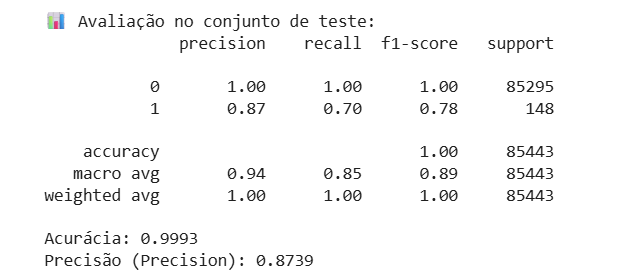

2) **df_top_features_extend.csv** + RandomSearchCV

 - X_treino_ext.csv
 - X_teste_ext.csv
 - y_treino_ext.csv
 - y_teste_ext.csv

In [56]:
# ⚡️ Random Search para otimizar XGBoost (versão estendida — foco: alta acurácia e minimização de falsos positivos)
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score
from scipy.stats import randint, uniform
import joblib
import numpy as np

# 1️⃣ Carregar as bases salvas (versão extended)
X_treino_ext = pd.read_csv('X_treino_ext.csv')
X_teste_ext = pd.read_csv('X_teste_ext.csv')
y_treino_ext = pd.read_csv('y_treino_ext.csv').squeeze()
y_teste_ext = pd.read_csv('y_teste_ext.csv').squeeze()

print("✅ Bases estendidas carregadas com sucesso!")
print(f"Shape treino: {X_treino_ext.shape}, teste: {X_teste_ext.shape}")

# 2️⃣ Criar modelo base do XGBoost
modelo_xgb_ext = xgb.XGBClassifier(
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss',
    tree_method='hist'   # mais rápido e otimizado p/ grandes volumes
)

# 3️⃣ Espaço de busca dos hiperparâmetros — conservador (minimiza falsos positivos)
param_dist_ext = {
    'n_estimators': randint(200, 800),
    'max_depth': randint(3, 8),
    'learning_rate': uniform(0.01, 0.1),
    'subsample': uniform(0.6, 0.3),
    'colsample_bytree': uniform(0.6, 0.3),
    'gamma': uniform(0.2, 1),
    'reg_alpha': uniform(0.3, 1),
    'reg_lambda': uniform(0.7, 1.5)
}

# 4️⃣ Configurar o RandomizedSearchCV (foco: alta precisão)
random_search_ext = RandomizedSearchCV(
    estimator=modelo_xgb_ext,
    param_distributions=param_dist_ext,
    n_iter=15,
    scoring='precision',  # minimiza falsos positivos
    cv=2,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 5️⃣ Rodar o Random Search
print("\n🔍 Iniciando busca pelos melhores parâmetros (XGBoost - versão estendida)...")
random_search_ext.fit(X_treino_ext, y_treino_ext)

# 6️⃣ Exibir melhores parâmetros encontrados
print("\n🏆 Melhores parâmetros encontrados (versão estendida):")
print(random_search_ext.best_params_)

# 7️⃣ Avaliar no conjunto de teste
melhor_xgb_ext = random_search_ext.best_estimator_

# Obter probabilidades
y_prob_ext = melhor_xgb_ext.predict_proba(X_teste_ext)[:, 1]

# Ajustar o limiar de decisão
threshold_ext = 0.65
y_pred_ext_custom = (y_prob_ext >= threshold_ext).astype(int)

print(f"\n⚙️ Threshold ajustado para {threshold_ext:.2f} (menor chance de falsos positivos)")

# 8️⃣ Métricas de avaliação
print("\n📊 Avaliação no conjunto de teste (versão estendida):")
print(classification_report(y_teste_ext, y_pred_ext_custom))
print(f"Acurácia: {accuracy_score(y_teste_ext, y_pred_ext_custom):.4f}")
print(f"Precisão (Precision): {precision_score(y_teste_ext, y_pred_ext_custom):.4f}")

# 9️⃣ Matriz de confusão
cm_ext = confusion_matrix(y_teste_ext, y_pred_ext_custom)
print("\n🧩 Matriz de Confusão (versão estendida):")
print(cm_ext)
print("\n➡️ Interpretação:")
print(f"Verdadeiros Negativos (clientes corretos): {cm_ext[0,0]}")
print(f"Falsos Positivos (alertas errados): {cm_ext[0,1]}")
print(f"Falsos Negativos (fraudes não detectadas): {cm_ext[1,0]}")
print(f"Verdadeiros Positivos (fraudes corretas): {cm_ext[1,1]}")

# 🔟 Salvar o modelo treinado
joblib.dump(melhor_xgb_ext, 'best_xgboost_model_precision_ext.pkl')
print("\n💾 Modelo salvo como 'best_xgboost_model_precision_ext.pkl'")


✅ Bases estendidas carregadas com sucesso!
Shape treino: (199364, 12), teste: (85443, 12)

🔍 Iniciando busca pelos melhores parâmetros (XGBoost - versão estendida)...
Fitting 2 folds for each of 15 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:59:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🏆 Melhores parâmetros encontrados (versão estendida):
{'colsample_bytree': np.float64(0.6550213529560301), 'gamma': np.float64(0.5042422429595377), 'learning_rate': np.float64(0.062475643163223786), 'max_depth': 6, 'n_estimators': 760, 'reg_alpha': np.float64(0.8247746602583892), 'reg_lambda': np.float64(1.299791457572883), 'subsample': np.float64(0.6139996989640846)}

⚙️ Threshold ajustado para 0.65 (menor chance de falsos positivos)

📊 Avaliação no conjunto de teste (versão estendida):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.72      0.82       148

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Acurácia: 0.9994
Precisão (Precision): 0.9550

🧩 Matriz de Confusão (versão estendida):
[[85290     5]
 [   42   106]]

➡️ Interpretação:
Verdadeiros Negativos (clientes corretos)

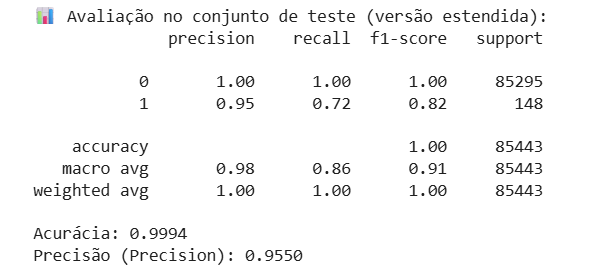

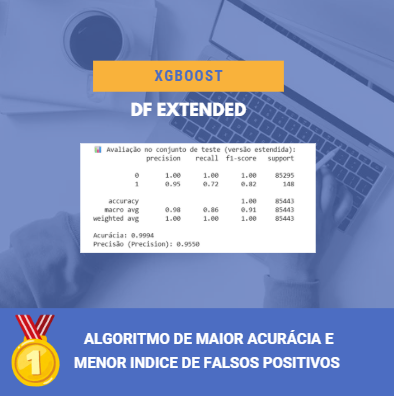

**RESUMO**: O modelo XGBoost, quando treinado com o DataFrame estendido — que inclui as variáveis Time e Amount — apresentou o melhor desempenho geral entre todos os modelos testados. O acréscimo dessas features contribuiu significativamente para o aumento da performance do algoritmo, resultando em acurácia de 0.9994 e precisão de 0.9550. Esses resultados indicam que as variáveis temporais e monetárias possuem forte influência na detecção de padrões de fraude.